In [3]:
from pathlib import Path as P
from meterviewer.views.quick import fast_preview
def more_faster(dataset):
    x, y = fast_preview(dataset)

parent = "/home/svtter/Work/Dataset/MeterData/"
data_list = "generated_new", "generated_new_2", "generated_new_3", "generated_new_4", "generated_new_5"

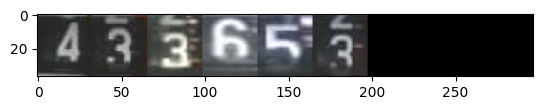

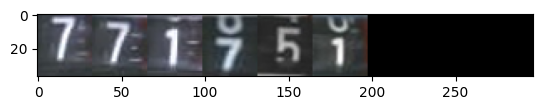

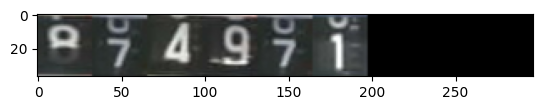

Data written to '/home/svtter/Work/Dataset/MeterData/generated_new/details.gen.toml' successfully.


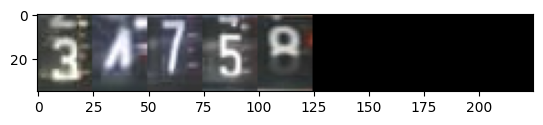

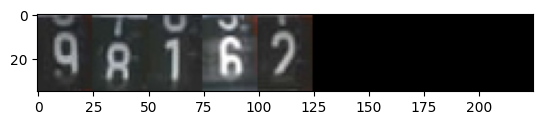

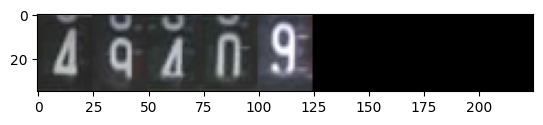

Data written to '/home/svtter/Work/Dataset/MeterData/generated_new_2/details.gen.toml' successfully.


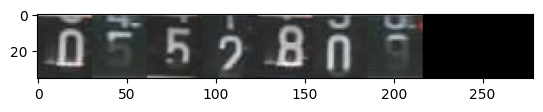

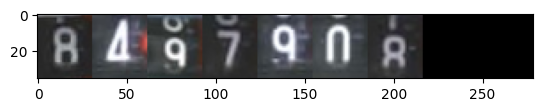

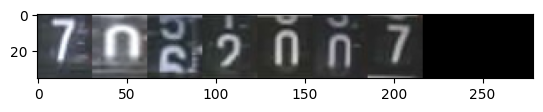

Data written to '/home/svtter/Work/Dataset/MeterData/generated_new_3/details.gen.toml' successfully.


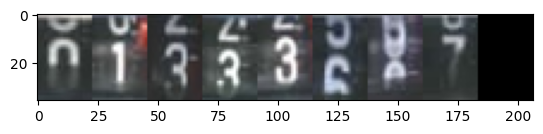

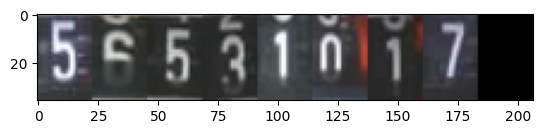

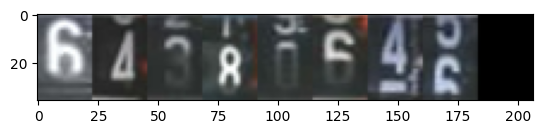

Data written to '/home/svtter/Work/Dataset/MeterData/generated_new_4/details.gen.toml' successfully.


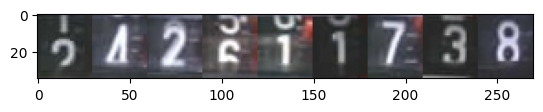

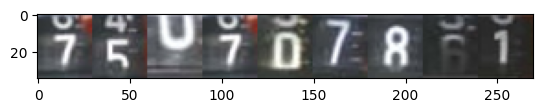

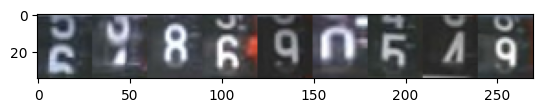

Data written to '/home/svtter/Work/Dataset/MeterData/generated_new_5/details.gen.toml' successfully.


In [4]:
x_all, y_all = [], []
for name in data_list:
    dataset = P(parent) / name
    x, y = fast_preview(dataset)
    x_all.append(x)
    y_all.append(y)

In [7]:
len(x_all), len(y_all)
# dataset length list: (5, 6, 7, 8, 9)

(5, 5)

In [9]:
x_all[0].shape, x_all[1].shape

((100000, 37, 297, 3), (100000, 35, 225, 3))